In [1]:
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

In [2]:
BoxLength = 60
R = 20
filename = "A123456789B.cat"

catalog = np.loadtxt(filename)

X = catalog[:,0]
Y = catalog[:,1]
Z = catalog[:,2]

In [3]:
N = len(X)

In [4]:
rndcat = np.zeros([N,3])

for r in rndcat:
    a = np.random.random()
    b = np.random.random()
    c = np.random.random()
    
    r += BoxLength * np.array([a,b,c])

In [5]:
rndcat

array([[18.75172396, 45.58023447, 49.84395054],
       [21.36519186, 12.44502392, 53.81129304],
       [10.41168764,  9.49418433, 28.86435181],
       ...,
       [58.49019584, 26.75569537, 47.59230419],
       [42.74905834, 54.03679772, 22.85804777],
       [42.11449456, 50.84265558, 12.10200479]])

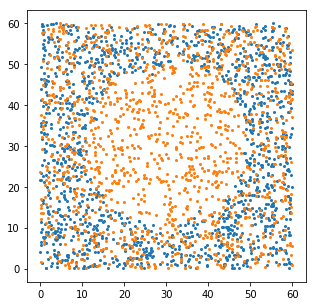

In [6]:
indexC = np.where( abs(catalog[:,2] - BoxLength / 2) < R / 2 )    
    
fig = plt.figure(figsize=[5,5])
plt.scatter(catalog[indexC,0], catalog[indexC,1], s=4)

indexR = np.where( abs(catalog[:,2] - BoxLength / 2) < R / 2 )

plt.scatter(rndcat[indexR,0], rndcat[indexR,1], s=4)

In [15]:
fullcat = np.vstack((rndcat, catalog))

In [16]:
fullcat.shape


(10086, 3)

filename = "fullCat.cat"

with open( filename, "w") as file:
    for v in fullcat:
        file.write(str(v[0])+" "+str(v[1])+" "+str(v[2])+"\n")

print("Data saved to '" + filename + "'.") 

# Now, go to terminal and run Beta Skeleton over the FullCatalog.

![title](a_few_moments_later.jpg)




In [17]:
filename = "fullCat_BETA_1.0.bsk"

# Full Catalog (cat + rndm) Beta Skeleton
fcBSkel = np.loadtxt(filename)


In [18]:
fcBSkel.shape

(75914, 2)

In [19]:
# First criterion: Drop from the begining all catalog points.

index = np.where(fcBSkel[:,0] < N)
fcBSkel = fcBSkel[index].astype(int)
fcBSkel.shape

(38026, 2)

In [22]:
index = np.where(fcBSkel[:,1] > N)

In [23]:
index[0].shape

(17572,)

In [24]:
droplist_raw = fcBSkel[index[0],0]

In [25]:
droplist_raw.shape

(17572,)

In [28]:
droplist_raw[999]

307

In [29]:
droplist = list(set(droplist_raw))

In [30]:
len(droplist)

4505

In [43]:
def plot_slice(cat, ps=1):
    fig = plt.figure(figsize=[5,5])
    index = np.where( abs(cat[:,2] - BoxLength / 2) < R / 3 )
    print(index[0].shape)
    plt.scatter(cat[index[0],0], cat[index[0],1], s=ps)


(979,)
(1095,)


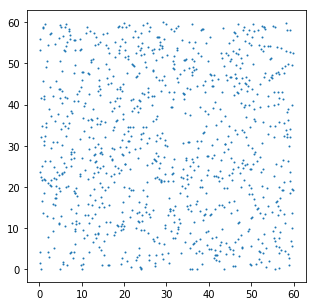

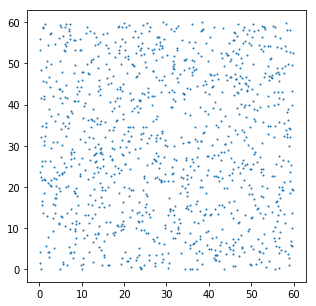

In [44]:

fig = plt.figure
plot_slice(rndcat[droplist], ps=1)
fig = plt.figure
plot_slice(rndcat, ps=1)

The idea is to do something like this

index = np.where( first_filter[:,0] != droplist[])

In [41]:
for x in c:
    if(x not in b):
        print(x)
    

1
3
5
7
9


In [45]:
first_filter = first_filter.astype(int)

In [46]:
void_points = []

for  x in list(set(first_filter[:,0])):
    if( x not in droplist):
        void_points.append(x)

In [47]:
void_points

[5,
 9,
 20,
 40,
 41,
 44,
 64,
 66,
 68,
 81,
 92,
 100,
 113,
 114,
 115,
 116,
 130,
 131,
 132,
 163,
 165,
 168,
 172,
 188,
 189,
 191,
 198,
 214,
 216,
 222,
 223,
 225,
 239,
 250,
 257,
 258,
 260,
 270,
 282,
 284,
 285,
 287,
 289,
 291,
 300,
 305,
 315,
 324,
 326,
 336,
 337,
 343,
 348,
 350,
 363,
 378,
 380,
 401,
 404,
 414,
 419,
 431,
 458,
 459,
 460,
 487,
 513,
 517,
 520,
 526,
 558,
 564,
 569,
 578,
 583,
 587,
 597,
 599,
 606,
 614,
 652,
 668,
 669,
 679,
 681,
 688,
 702,
 706,
 713,
 731,
 738,
 746,
 747,
 783,
 800,
 808,
 809,
 836,
 851,
 859,
 868,
 870,
 872,
 891,
 892,
 905,
 908,
 910,
 919,
 937,
 945,
 950,
 958,
 966,
 974,
 977,
 979,
 985,
 994,
 1001,
 1003,
 1010,
 1012,
 1021,
 1029,
 1032,
 1066,
 1076,
 1086,
 1090,
 1115,
 1117,
 1121,
 1128,
 1138,
 1140,
 1141,
 1163,
 1168,
 1170,
 1172,
 1173,
 1179,
 1182,
 1183,
 1188,
 1220,
 1222,
 1232,
 1233,
 1238,
 1242,
 1253,
 1257,
 1264,
 1268,
 1292,
 1325,
 1334,
 1342,
 1343,
 1345

(538, 3)


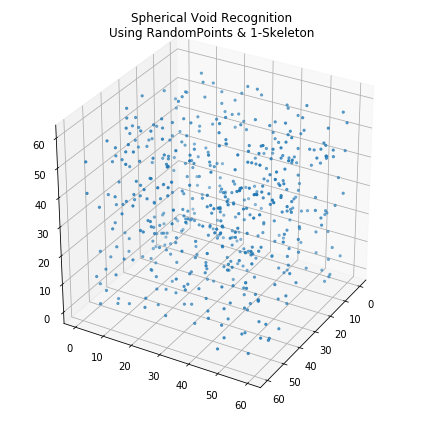

In [52]:
sphere = rndcat[void_points]
print(sphere.shape)

x = sphere[:,0]
y = sphere[:,1]
z = sphere[:,2]

fig = plt.figure(figsize=(6,6))
ax = fig.add_subplot(111, projection='3d')
ax.set_aspect('equal')

ax.scatter(x, y, z, s=5)
ax.view_init(30, 30)

plt.title("Spherical Void Recognition\nUsing RandomPoints & 1-Skeleton")
plt.tight_layout()
#plt.savefig("IrregularVoidSurface_for_" + a_label + "-" + b_label + "-skeletons.pdf")
#plt.close()

plt.show()